In [1]:
#Task 1
# Question 1
# Read the dataset from the below link
# https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
# Names/US_Baby_Names_right.csv
# Questions:
# 1. Delete unnamed columns
# 2. Show the distribution of male and female
# 3. Show the top 5 most preferred names
# 4. What is the median name occurence in the dataset
# 5. Distribution of male and female born count by states

import numpy as np
import pandas as pd

# data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
# data.head(5)

data = pd.read_csv('US_Baby_Names_right.csv') #Read from CSV
data.head(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [2]:
# 1. Delete unnamed columns

data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [3]:
#2. Show the distribution of male and female

data.groupby('Gender').count()

,Id,Name,Year,State,Count
Gender,,,,,
F,558846,558846,558846,558846,558846
M,457549,457549,457549,457549,457549


In [4]:
# 3. Show the top 5 most preferred names
pd.value_counts(data['Name'].values, sort=True).head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
dtype: int64

In [29]:
# 4. What is the median name occurence in the dataset

# pd.value_counts(data['Name'].values, sort=True).median
print("Median = " +str(data.loc[:,"Id"].median())) # to print median

print("Median = " +str(data["Id"].median())) #  another interpretation of median

# print(data.median(axis=0)) # To print median of all numeric fields
print(\n " Median Record is : ")
data[data.Id==data.median()['Id']] # To get median record


Median = 2811921.0
Median = 2811921.0


,Id,Name,Year,Gender,State,Count
508197,2811921,Kasey,2010,F,MO,6


In [67]:
# 5. Distribution of male and female born count by states

# Using Pivot
pd.pivot_table(data,index="Gender", columns="State", aggfunc="count")

# Using crosstab
pd.crosstab(index=data.Gender,columns=data.State)


Count                                                            ...   \
State     AK    AL    AR     AZ     CA     CO    CT    DC    DE     FL  ...    
Gender                                                                  ...    
F       2404  9878  7171  14518  45144  11424  6575  3053  2549  25781  ...    
M       2587  8419  6475  10820  31637   9183  5733  3000  2440  20070  ...    

        Year                                                             
State     SD     TN     TX    UT     VA    VT     WA     WI    WV    WY  
Gender                                                                   
F       2838  13063  39760  9515  14759  1398  13329  10549  4305  1456  
M       2908  10588  27791  8233  11997  1618  11049   8940  3733  1904  

[2 rows x 204 columns]

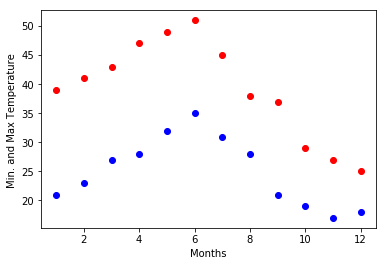

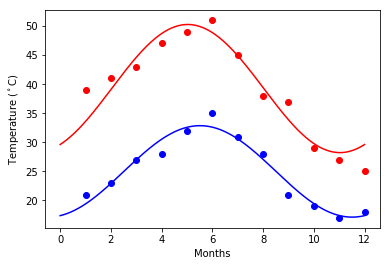

In [8]:
# Task 2
# We have the min and max temperatures in a city In India for each months of the year. We
# would like to find a function to describe this and show it graphically, the dataset given below.
# Task:
# 1. fitting it to the periodic function
# 2. plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
Max=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(months,Max,'ro')  #Red color
plt.plot(months,Min, 'bo') #Blue color
plt.xlabel('Months') 
plt.ylabel("Min. and Max Temperature ")
# plt.show()

from scipy import  optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()

plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')
plt.show()
